In [1]:
!pip install easy-vqa

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from easy_vqa import get_train_questions, get_test_questions
from easy_vqa import get_train_image_paths, get_test_image_paths
from matplotlib import pyplot as plt

c:\Users\vedas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory

In [4]:
# Data Loading and Processing
train_questions, train_answers, train_image_ids = get_train_questions()
test_questions, test_answers, test_image_ids = get_test_questions()

In [5]:
print(train_questions[0]) 
print(train_answers[0])   
print(train_image_ids[0]) 

what is the blue shape?
rectangle
0


In [6]:
train_image_paths = get_train_image_paths()
test_image_paths = get_test_image_paths()

print(train_image_paths[1])

c:\Users\vedas\anaconda3\lib\site-packages\easy_vqa\data/train/images\1.png


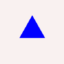

In [7]:
img = load_img(train_image_paths[1])
img

In [8]:
#Normalizing Image
def normalize_img(image_path):
    img = img_to_array(load_img(image_path))
    return img / 255.0

In [9]:
def read_images(paths):
  # paths is a dict mapping image ID to image path
  # Returns a dict mapping image ID to the processed image
  ims = {}
  for image_id, image_path in paths.items():
    ims[image_id] = normalize_img(image_path)
  return ims

In [10]:
train_imgs = read_images(train_image_paths)
test_imgs = read_images(test_image_paths)

In [11]:
train_imgs[0]

array([[[0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        ...,
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ]],

       [[0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        ...,
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ]],

       [[0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        ...,
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ]],

       ...,

       [[0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0.91764706, 0.9019608 ],
        [0.972549  , 0

In [12]:
train_imgs[0].shape  

(64, 64, 3)

In [13]:
print(len(train_image_ids))
print(len(train_imgs))

38575
4000


In [14]:
# Adjusting train and test images in order of train and test questions

xtrain = np.asarray([train_imgs[id] for id in train_image_ids])
xtest = np.asarray([test_imgs[id] for id in test_image_ids])

In [15]:
xtrain.shape

(38575, 64, 64, 3)

In [16]:
type(xtrain)

numpy.ndarray

In [17]:
### Converting answers to vectors
from easy_vqa import get_answers
from tensorflow.keras.utils import to_categorical

In [18]:
answers_list = get_answers()
answers_list

['circle',
 'green',
 'red',
 'gray',
 'yes',
 'teal',
 'black',
 'rectangle',
 'yellow',
 'triangle',
 'brown',
 'blue',
 'no']

In [20]:
ytrain = to_categorical(trainA)
ytest = to_categorical(testA)

print(ytrain[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [21]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dense, Dropout

In [22]:
# Building a Model

ip = Input(shape=(64, 64, 3))

x = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(ip)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.3)(x)

x = Flatten()(x)

img_op = Dense(32, activation = 'relu')(x)

In [23]:
#Text Tokenization

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
train_unique_words = []
train_unique_words = set(train_unique_words)

for idx in range(len(train_questions)):
    sentence = train_questions[idx].split()
    for word in sentence:
        train_unique_words.add(word)
        
print(len(train_unique_words))

32


In [25]:
train_unique_words

{'a',
 'black',
 'blue',
 'brown',
 'circle',
 'circle?',
 'color',
 'contain',
 'contain?',
 'does',
 'gray',
 'green',
 'image',
 'image?',
 'in',
 'is',
 'no',
 'not',
 'of',
 'present?',
 'rectangle',
 'rectangle?',
 'red',
 'shape',
 'shape?',
 'teal',
 'the',
 'there',
 'triangle',
 'triangle?',
 'what',
 'yellow'}

In [26]:
test_unique_words = []
test_unique_words = set(test_unique_words)

for idx in range(len(test_questions)):
    sentence = train_questions[idx].split()
    for word in sentence:
        test_unique_words.add(word)
        
print(len(test_unique_words))

32


In [27]:
test_unique_words 

{'a',
 'black',
 'blue',
 'brown',
 'circle',
 'circle?',
 'color',
 'contain',
 'contain?',
 'does',
 'gray',
 'green',
 'image',
 'image?',
 'in',
 'is',
 'no',
 'not',
 'of',
 'present?',
 'rectangle',
 'rectangle?',
 'red',
 'shape',
 'shape?',
 'teal',
 'the',
 'there',
 'triangle',
 'triangle?',
 'what',
 'yellow'}

In [28]:
tokenizer = Tokenizer(num_words = 35, oov_token = '<OOV>')
tokenizer.fit_on_texts(train_questions)

In [29]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'is': 2,
 'shape': 3,
 'the': 4,
 'a': 5,
 'image': 6,
 'there': 7,
 'not': 8,
 'what': 9,
 'present': 10,
 'does': 11,
 'contain': 12,
 'in': 13,
 'color': 14,
 'no': 15,
 'circle': 16,
 'rectangle': 17,
 'triangle': 18,
 'brown': 19,
 'yellow': 20,
 'gray': 21,
 'teal': 22,
 'black': 23,
 'red': 24,
 'green': 25,
 'blue': 26,
 'of': 27}

In [30]:
train_seq = tokenizer.texts_to_sequences(train_questions)
test_seq = tokenizer.texts_to_sequences(test_questions)

In [31]:
print(train_seq[0])
print(train_questions[0])

[9, 2, 4, 26, 3]
what is the blue shape?


In [32]:
padded_train_seq = pad_sequences(train_seq, padding = 'post')
padded_test_seq = pad_sequences(test_seq, padding = 'post')

In [33]:
len(padded_train_seq[69]) # length of the input sequence

9

In [34]:
padded_train_seq.shape

(38575, 9)

In [35]:
type(padded_train_seq)

numpy.ndarray

In [36]:
vocab_size = len(word_index) + 1
vocab_size

28

In [37]:
#Texts Model

from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.layers import Multiply

In [38]:
t_input = Input(shape = (9, ))
y = Embedding(vocab_size, 64)(t_input)
y = LSTM(64)(y)
t_op = Dense(32, activation = 'relu')(y)

In [39]:
output = Multiply()([img_op, t_op])
output = Dense(32, activation = 'relu')(output)
output = Dense(13, activation = 'softmax')(output)

In [40]:
#Combining the Image and Text Model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [41]:
model = Model(inputs = [ip, t_input], outputs = output)

In [42]:
model.compile(optimizer = Adam(learning_rate = 5e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

In [44]:
#Training the Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint('model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 3,
    min_lr = 1e-5
)

callbacks = [checkpoint, reduce_lr]

In [45]:
history = model.fit(
    [xtrain, padded_train_seq],
    ytrain,
    validation_data=([xtest, padded_test_seq], ytest),
    batch_size = 64,
    shuffle = True,
    epochs=3,
    callbacks = callbacks,
)

Epoch 1/3
603/603 [==============================] - 114s 186ms/step - loss: 0.8200 - accuracy: 0.6712 - val_loss: 0.8153 - val_accuracy: 0.7100 - lr: 5.0000e-04
Epoch 2/3
603/603 [==============================] - 105s 174ms/step - loss: 0.4982 - accuracy: 0.7880 - val_loss: 1.3755 - val_accuracy: 0.7181 - lr: 5.0000e-04
Epoch 3/3
603/603 [==============================] - 113s 188ms/step - loss: 0.4524 - accuracy: 0.8080 - val_loss: 1.1003 - val_accuracy: 0.7551 - lr: 5.0000e-04


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


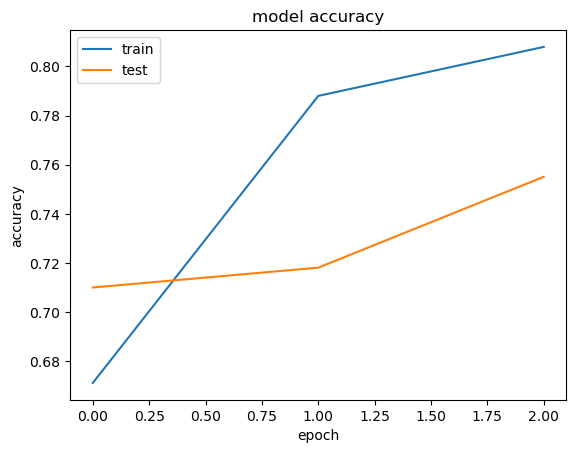

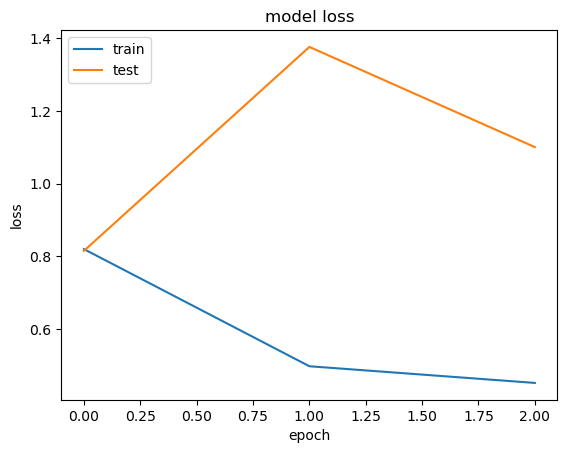

In [46]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()